# Image denoising

### Singular value thresholding

In [1]:
import numpy as np
from scipy.stats import bernoulli
from utils import *
from svt_solver import *

import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import cv2

In [2]:
img = Image.open('cameraman.png').convert('L')
img = np.asarray(img, dtype='float') #/255.

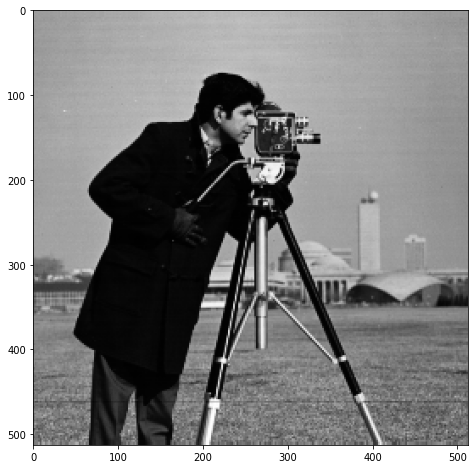

In [3]:
fig = plt.figure(figsize=[8,8])
plt.imshow(img, cmap='gray')
plt.show()

**Add noise**

In [4]:
def gen_mask(m, n, prob_masked=0.5):
    """
    Generate a binary mask for m x n matrix.
    Note that 1 denotes observed, and 0 denotes unobserved.
    """
    return 1 - bernoulli.rvs(p=prob_masked, size=(m, n))

<Figure size 1152x576 with 0 Axes>

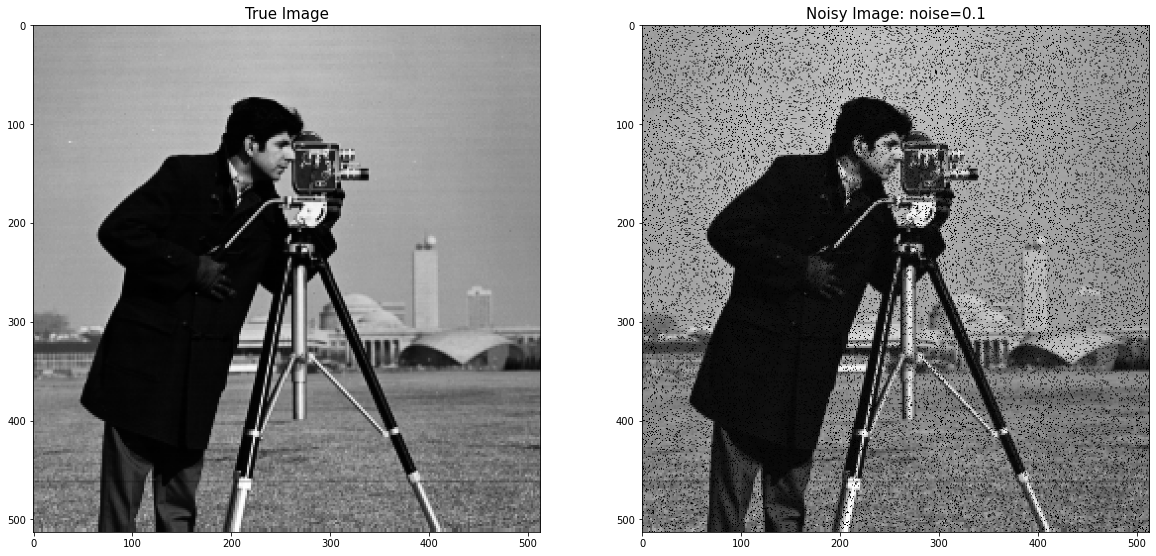

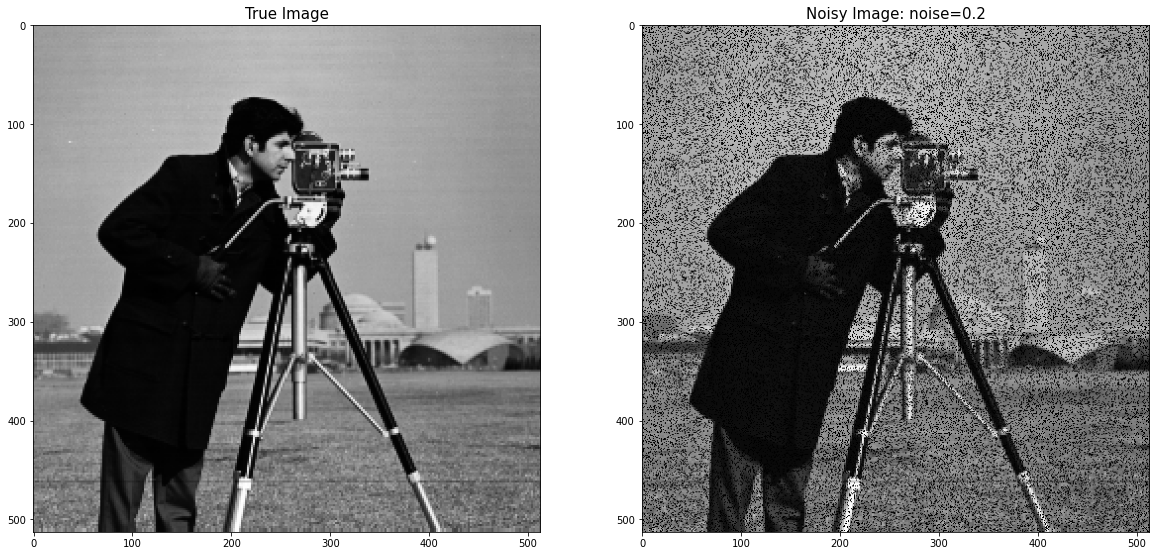

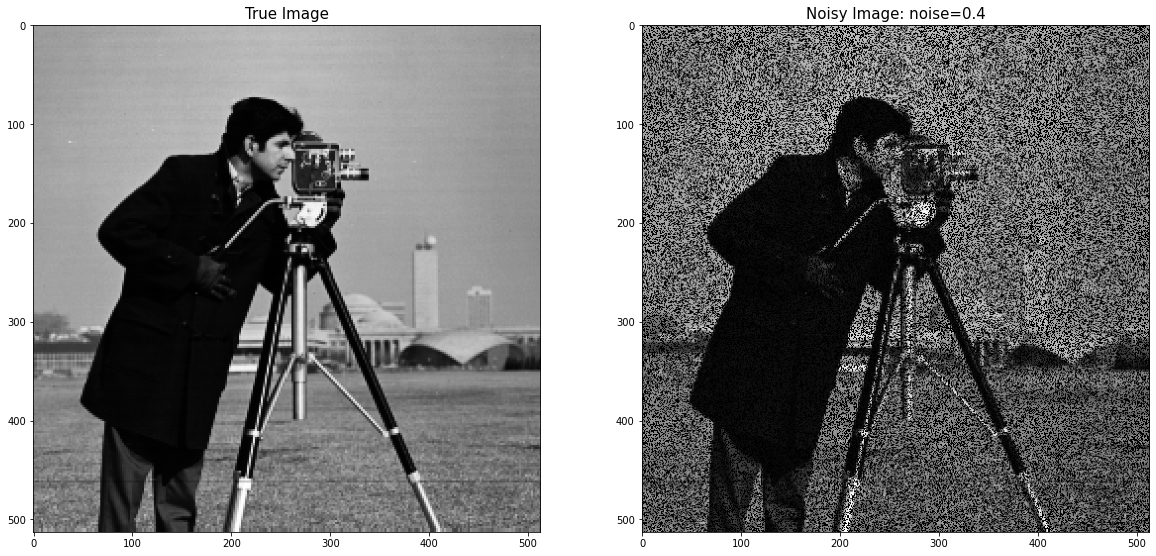

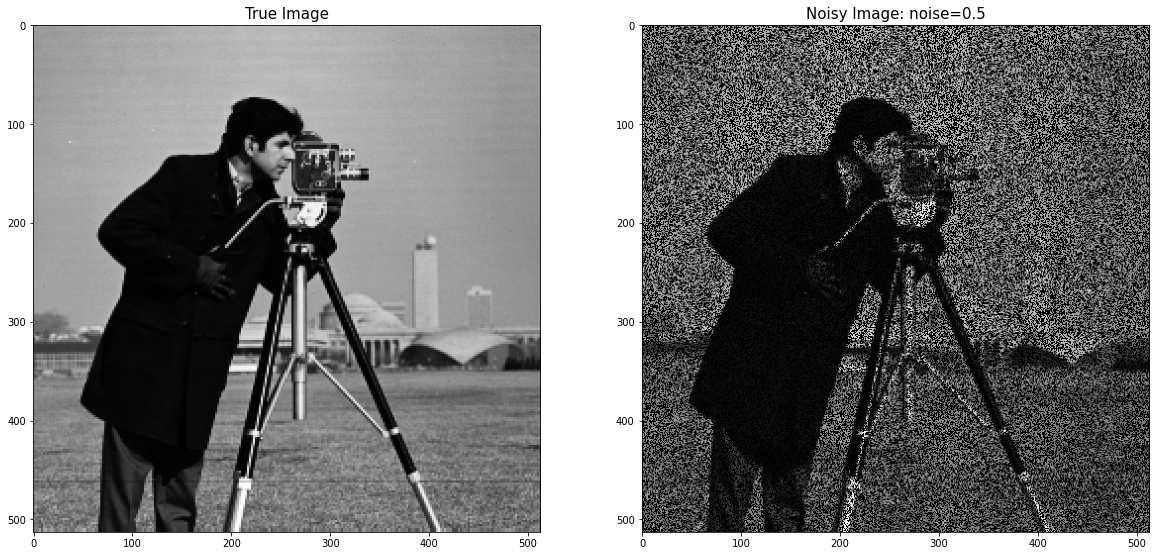

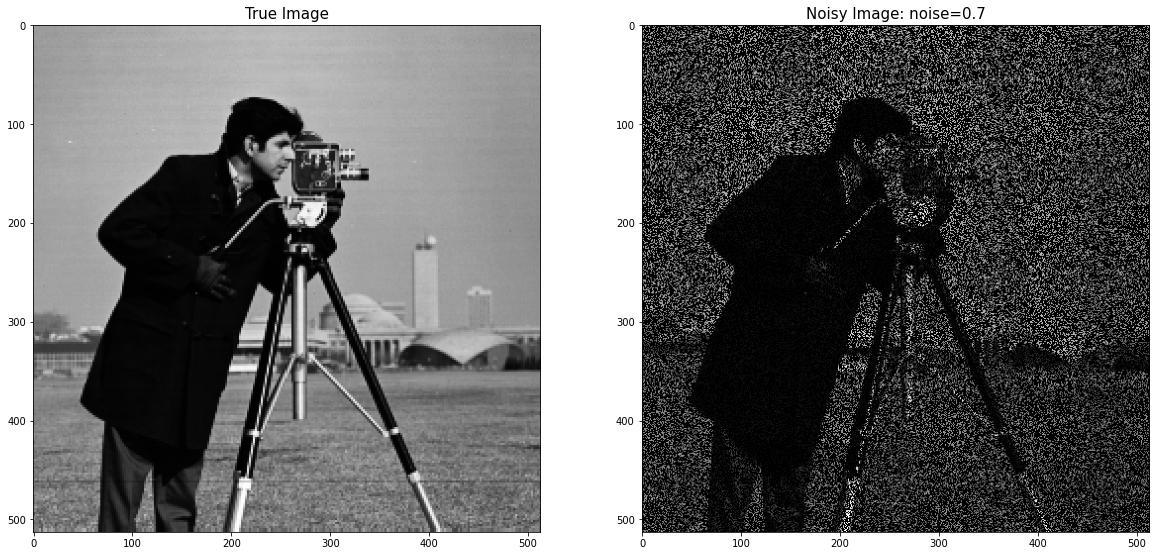

In [5]:
m, n = img.shape
noise_level = [0.1, 0.2, 0.4, 0.5, 0.7]

plt.figure(figsize=(16, 8))
for i, nl in enumerate(noise_level):
    mask = gen_mask(m, n, nl)
    img_noisy = img*mask
    plot_proc(img, img_noisy, 'Noisy Image: noise='+str(nl))


**Solve by svt**

SVT k 10, delta 0.2, noise level 0.1, RMSE:23.397 and SSIM: 0.187
SVT k 10, delta 0.2, noise level 0.2, RMSE:23.312 and SSIM: 0.183
SVT k 10, delta 0.2, noise level 0.4, RMSE:23.590 and SSIM: 0.173
SVT k 10, delta 0.2, noise level 0.5, RMSE:24.042 and SSIM: 0.171
SVT k 10, delta 0.2, noise level 0.7, RMSE:25.837 and SSIM: 0.130
SVT k 10, delta 0.5, noise level 0.1, RMSE:23.172 and SSIM: 0.188
SVT k 10, delta 0.5, noise level 0.2, RMSE:23.501 and SSIM: 0.181
SVT k 10, delta 0.5, noise level 0.4, RMSE:23.632 and SSIM: 0.172
SVT k 10, delta 0.5, noise level 0.5, RMSE:23.871 and SSIM: 0.172
SVT k 10, delta 0.5, noise level 0.7, RMSE:25.123 and SSIM: 0.144
SVT k 10, delta 1.5, noise level 0.1, RMSE:23.778 and SSIM: 0.185
SVT k 10, delta 1.5, noise level 0.2, RMSE:23.156 and SSIM: 0.177
SVT k 10, delta 1.5, noise level 0.4, RMSE:23.696 and SSIM: 0.177
SVT k 10, delta 1.5, noise level 0.5, RMSE:23.746 and SSIM: 0.166
SVT k 10, delta 1.5, noise level 0.7, RMSE:25.162 and SSIM: 0.146
SVT k 10, 

<Figure size 1440x720 with 0 Axes>

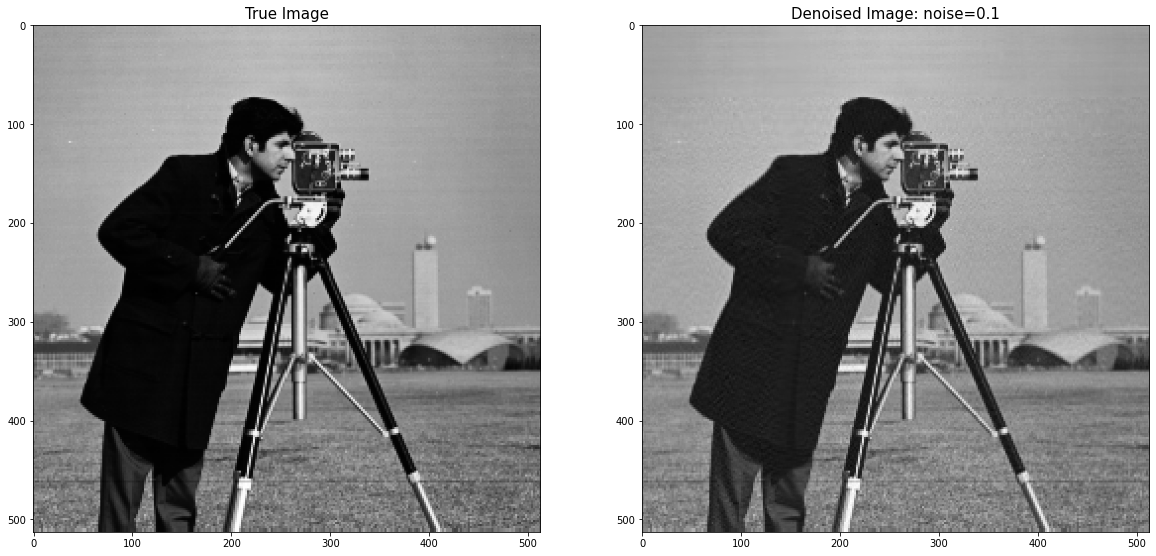

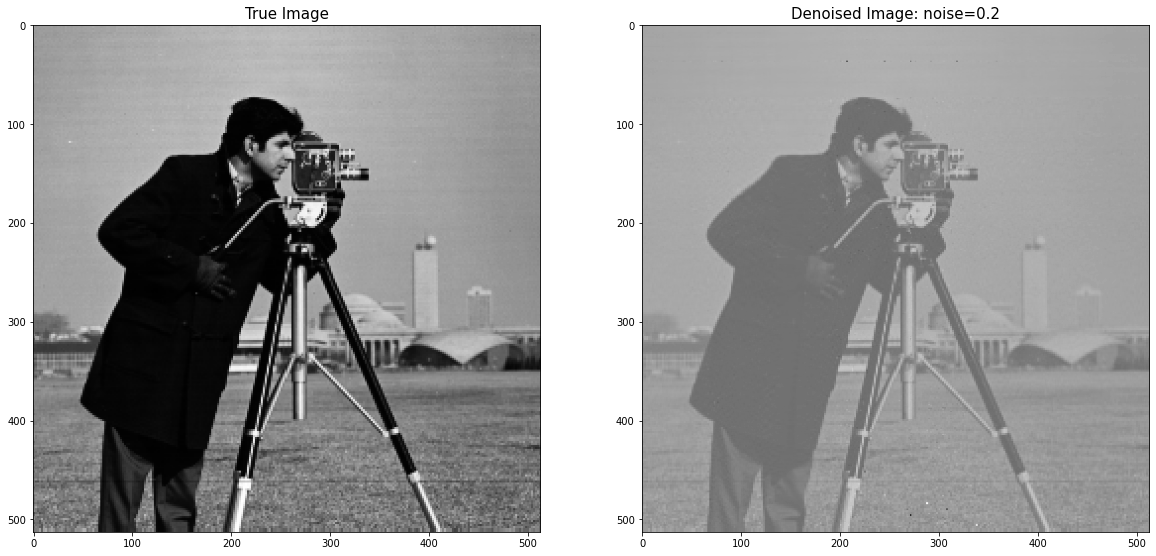

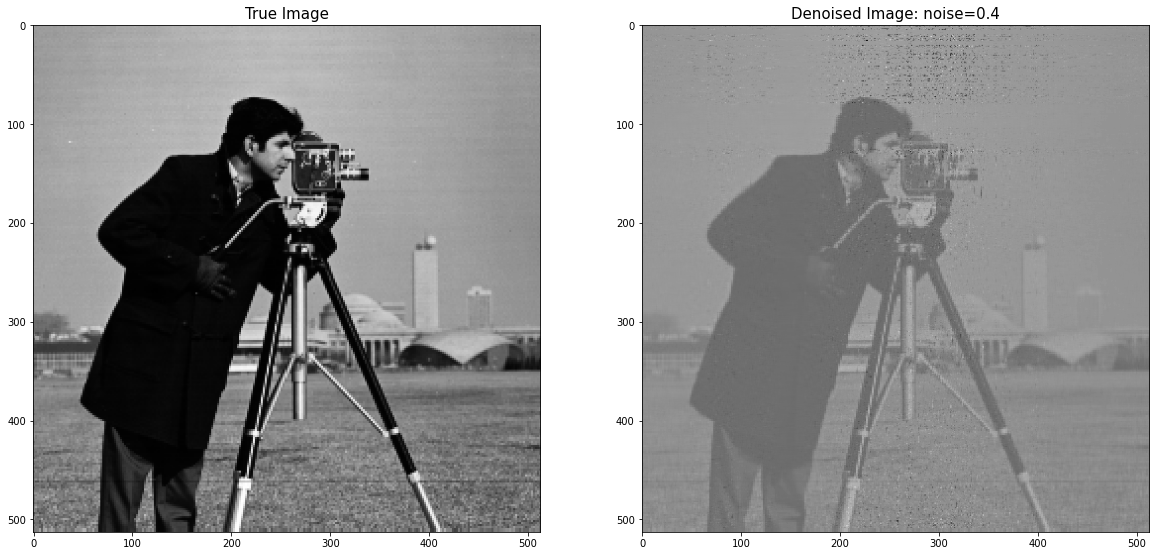

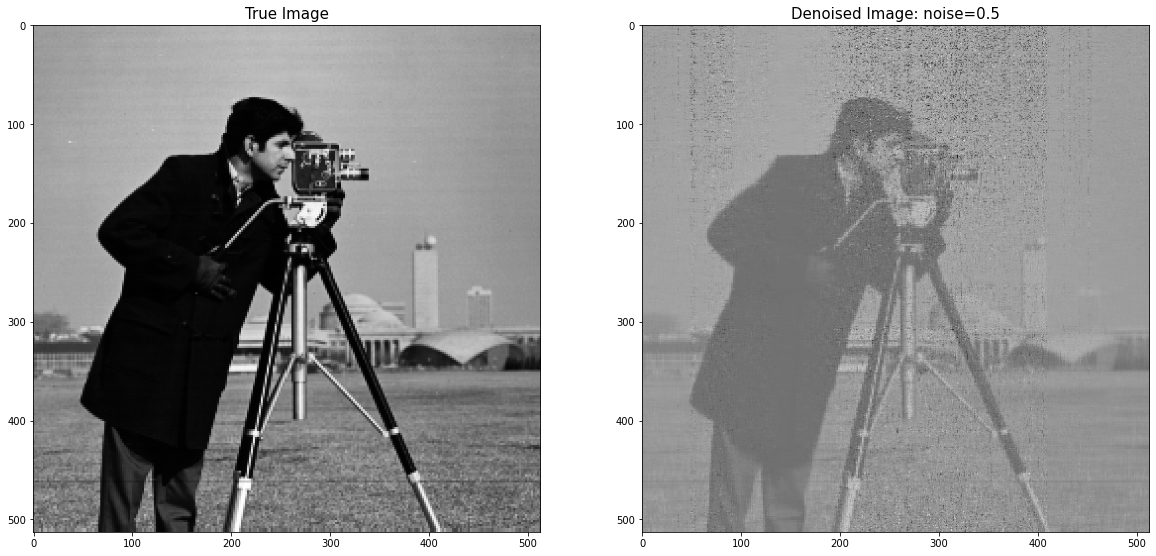

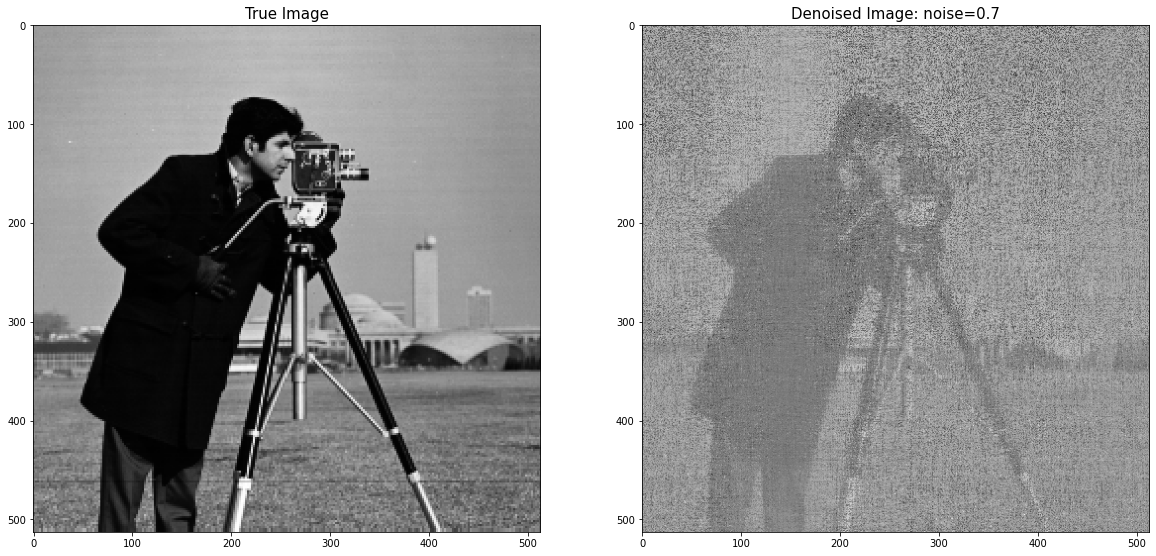

In [6]:
svd_k = [10, 50, 100]
svd_maxiter = 100 
svt_delta = [0.2, 0.5, 1.5, 1.7] #learning rate
e=0.0001 # stopping threshold
svt_maxiter=100

simm = []
noise_level = [0.1, 0.2, 0.4, 0.5, 0.7]

plt.figure(figsize=(20, 10))
for k in svd_k:
    simmd = []
    for d in svt_delta:
        simmn = []
        for i, nl in enumerate(noise_level):
            mask = gen_mask(m, n, nl)
            A = img*mask

            _, A_hat = svt_feature(A, svd_k=k, svt_delta=d)
            
            simmn.append(ssim(img,A_hat))
            
            print("SVT k {}, delta {}, noise level {}, RMSE:{:.3f} and SSIM: {:.3f}".format(k, d, nl, calc_unobserved_rmse(img, A_hat, mask), ssim(img,A_hat)))

            # Save noisy and denoised images
            if k==100 and d ==1.5:
                cv2.imwrite('results/svt/imgDenoised_' +str(nl)+'.jpg', A_hat)

                # Visualize results
                plot_proc(img, A_hat, 'Denoised Image: noise='+str(nl))

        simmd.append(simmn)
    simm.append(simmd)


In [9]:
res = np.asarray(simm)

In [11]:
res.shape

(3, 4, 5)

In [12]:
res

array([[[0.18674517, 0.18341497, 0.17294948, 0.17051712, 0.12959936],
        [0.18822241, 0.18088118, 0.17249034, 0.17156549, 0.14427717],
        [0.18488677, 0.17729397, 0.1767811 , 0.16606328, 0.14564509],
        [0.17216613, 0.17781417, 0.17548822, 0.17108342, 0.14745368]],

       [[0.46377773, 0.45637451, 0.38123985, 0.26661931, 0.08431512],
        [0.46332225, 0.45634234, 0.42474642, 0.36792834, 0.11389215],
        [0.43962432, 0.44583971, 0.42490328, 0.39304121, 0.15263391],
        [0.40793528, 0.41889512, 0.42631327, 0.39378294, 0.1520066 ]],

       [[0.62772912, 0.50397031, 0.25487174, 0.1563184 , 0.04834679],
        [0.6410803 , 0.55988174, 0.32138296, 0.20749287, 0.05086496],
        [0.62375138, 0.61519011, 0.38131488, 0.24134854, 0.04926675],
        [0.58160664, 0.59290609, 0.39737403, 0.24122489, 0.04979374]]])